# Compare Embedding Experiment Runs for Next Word Prediction
- 03-02-20
- Joel Stremmel

**Problem Statement:** Because communication costs are steep in the federated setting, every round counts toward learning word representations.  We propose a simple method to leverage pretrained word representations in the federated setting to reduce training time and achieve a small increase in test accuracy.

**Experiments:** The experiments reported in this notebook consist of fitting an LSTM model as described in the research report using different embedding representations of words then fine tuning the embedding layer along with all other model layers over a fixed number of training rounds.  

**Results:** The notebook is divided into three results sections:

- Small network train and validation loss and accuracy
- Large network train and validation loss and accuracy
- Test set loss and accuracy on 1,000,000 test samples using the model that achieved the best validation set performance across training rounds

### Imports

In [1]:
import os, sys, io
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from src import dataset, validation

# Part 1: Small Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Small Model (Batch Size 16)

In [10]:
network = '100_256_100'

In [11]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [12]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [13]:
pca_fasttext_train_loss = np.load('embedding_layer_results/pca_fasttext_{}/train_loss.npy'.format(network))
pca_fasttext_train_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/train_accuracy.npy'.format(network))
pca_fasttext_val_loss = np.load('embedding_layer_results/pca_fasttext_{}/val_loss.npy'.format(network))
pca_fasttext_val_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/val_accuracy.npy'.format(network))

In [14]:
pp_pca_pp_fasttext_train_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_loss.npy'.format(network))
pp_pca_pp_fasttext_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_accuracy.npy'.format(network))
pp_pca_pp_fasttext_val_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_loss.npy'.format(network))
pp_pca_pp_fasttext_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_accuracy.npy'.format(network))

In [15]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))

In [16]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Plot Train and Validation Loss from Small Model

In [17]:
x_axis = range(0, len(random_train_loss))

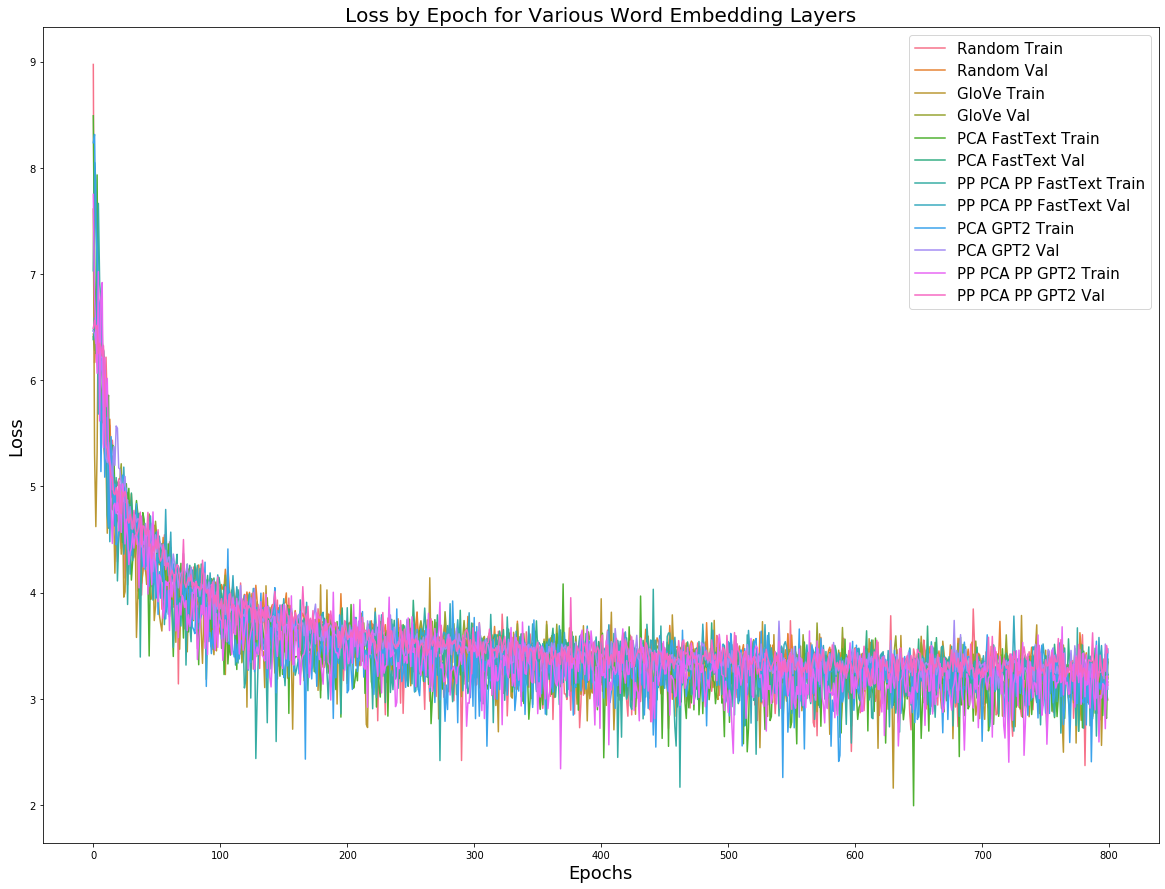

In [18]:
sns.set_palette(sns.color_palette("husl", 12))
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
ax.plot(x_axis, pca_fasttext_train_loss, label='PCA FastText Train')
ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
ax.plot(x_axis, pp_pca_pp_fasttext_train_loss, label='PP PCA PP FastText Train')
ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_loss, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Small Model

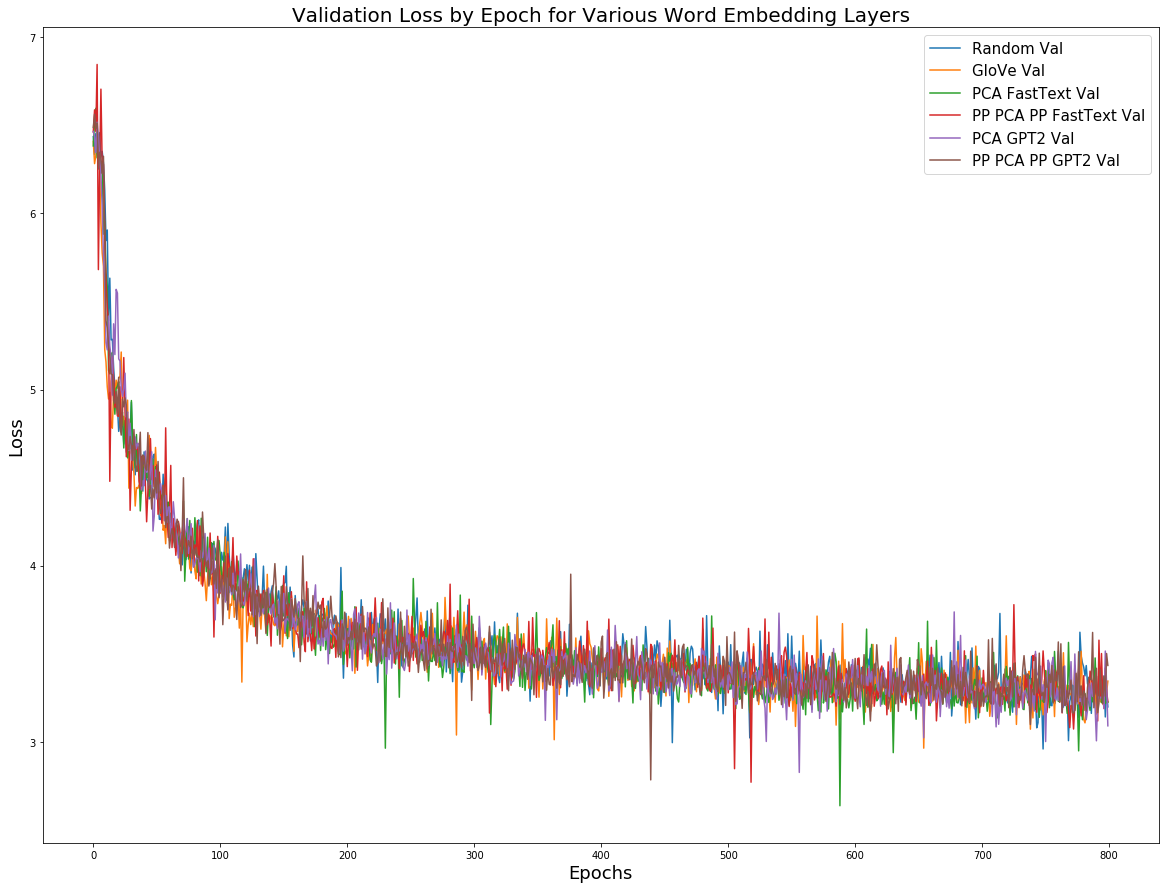

In [19]:
sns.set_palette("tab10")
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Small Model

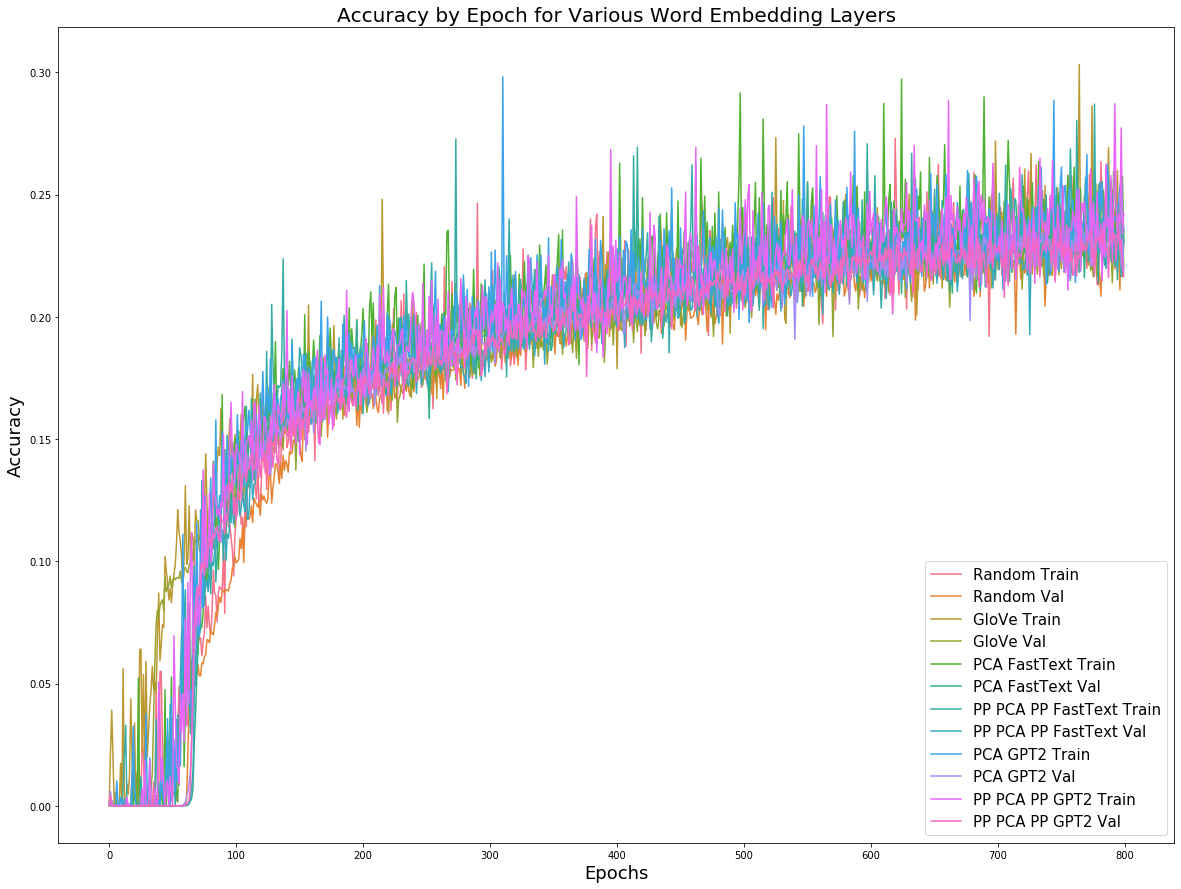

In [20]:
sns.set_palette(sns.color_palette("husl", 12))
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
ax.plot(x_axis, pca_fasttext_train_accuracy, label='PCA FastText Train')
ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
ax.plot(x_axis, pp_pca_pp_fasttext_train_accuracy, label='PP PCA PP FastText Train')
ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_accuracy, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Small Model

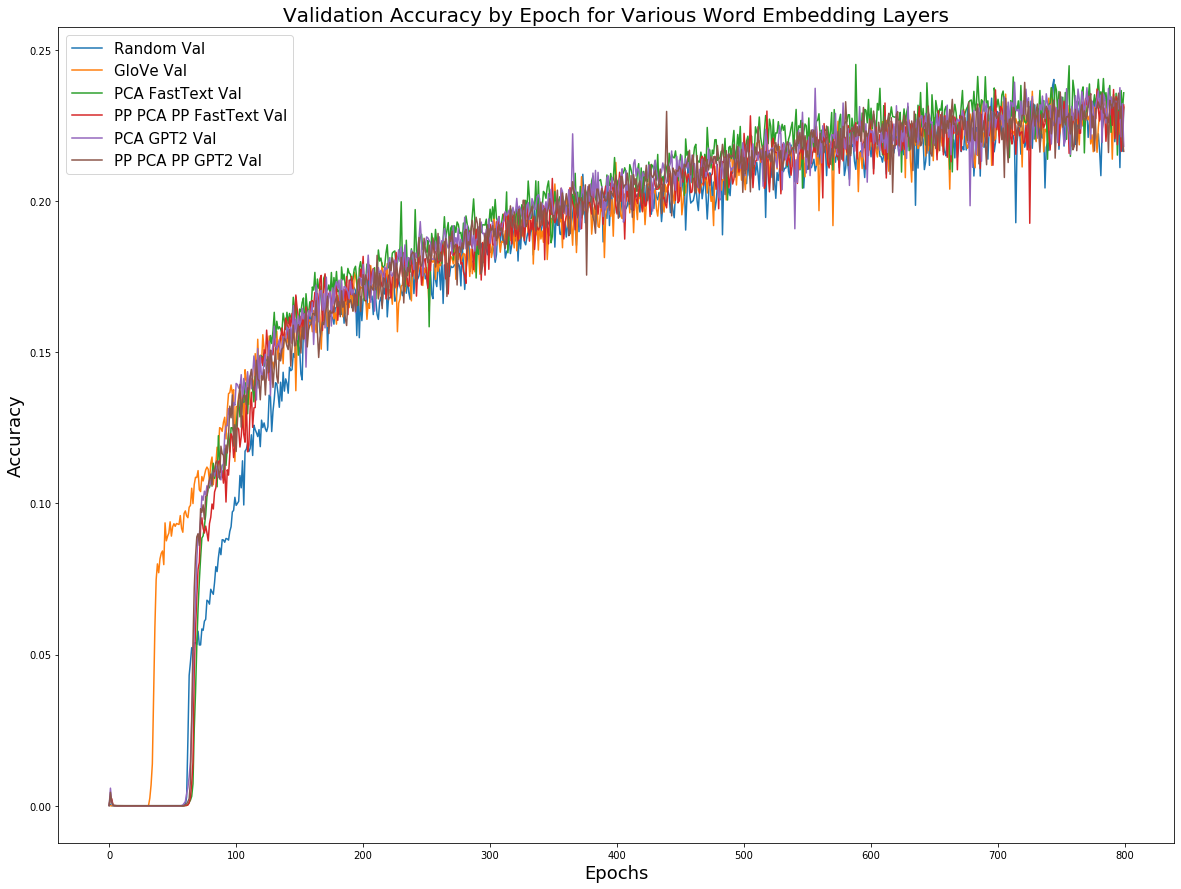

In [21]:
sns.set_palette("tab10")
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 2: Large Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Large Model (Batch Size 16)

In [22]:
network = '300_512_300'

In [23]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [24]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [25]:
fasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))
fasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))
fasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))
fasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))

In [26]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))

In [27]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

In [28]:
pretrainedNet_pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pretrainedNet_pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pretrainedNet_pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pretrainedNet_pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pretrainedNet_pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pretrainedNet_pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pretrainedNet_pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pretrainedNet_pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Plot Train and Validation Loss from Large Model

In [29]:
x_axis = range(0, len(random_train_loss))

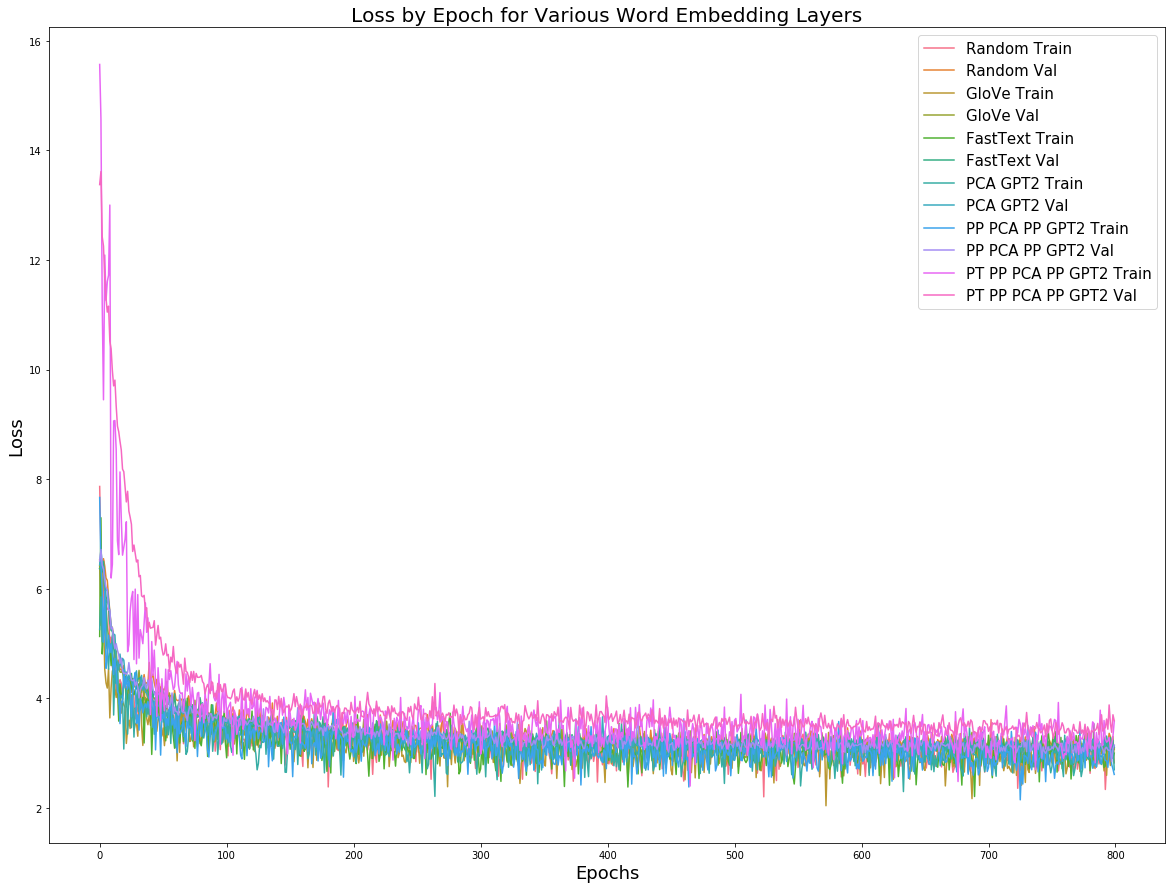

In [30]:
sns.set_palette(sns.color_palette("husl", 12))
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_train_loss, label='GloVe Train')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
ax.plot(x_axis, fasttext_train_loss, label='FastText Train')
ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pca_gpt2_train_loss, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_train_loss, label='PT PP PCA PP GPT2 Train')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_val_loss, label='PT PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Large Model

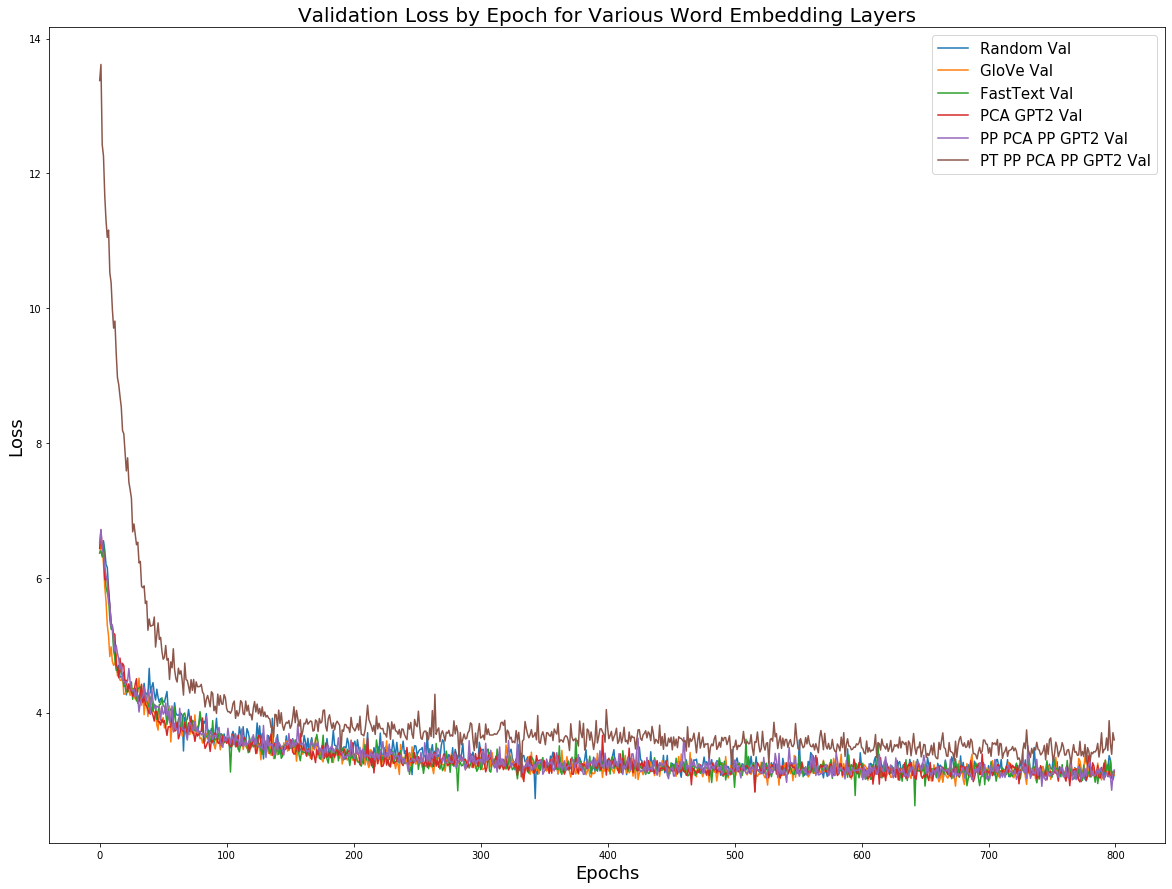

In [31]:
sns.set_palette("tab10")
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
ax.plot(x_axis, glove_val_loss, label='GloVe Val')
ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_val_loss, label='PT PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Large Model

### Next is the plot showing the results only from the pre-trained network, along with the PP PCA word embeddings

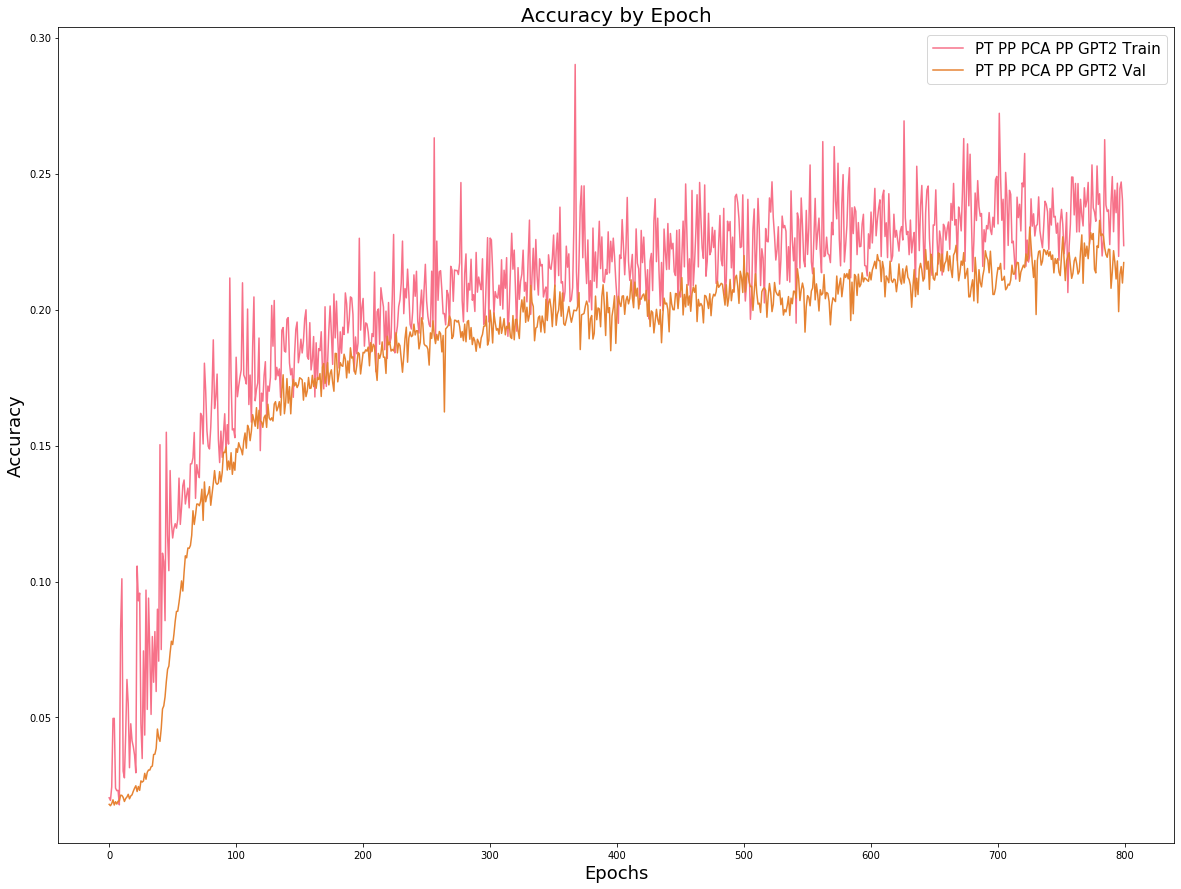

In [32]:
sns.set_palette(sns.color_palette("husl", 12))
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_train_accuracy, label='PT PP PCA PP GPT2 Train')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_val_accuracy, label='PT PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

In [8]:
max(pretrainedNet_pp_pca_pp_gpt2_train_accuracy)

0.29013675

In [9]:
max(pretrainedNet_pp_pca_pp_gpt2_val_accuracy)

0.23280996

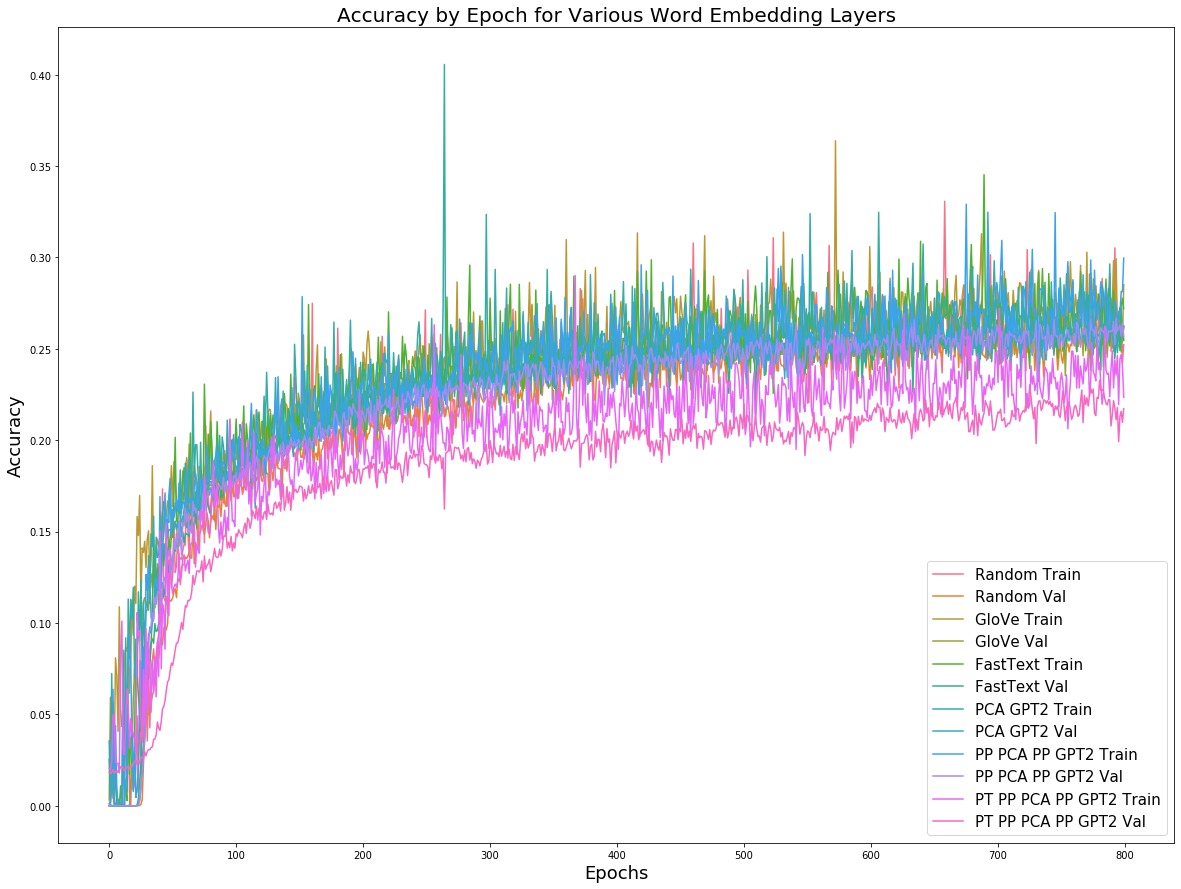

In [33]:
sns.set_palette(sns.color_palette("husl", 12))
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
ax.plot(x_axis, fasttext_train_accuracy, label='FastText Train')
ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pca_gpt2_train_accuracy, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_train_accuracy, label='PT PP PCA PP GPT2 Train')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_val_accuracy, label='PT PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Large Model

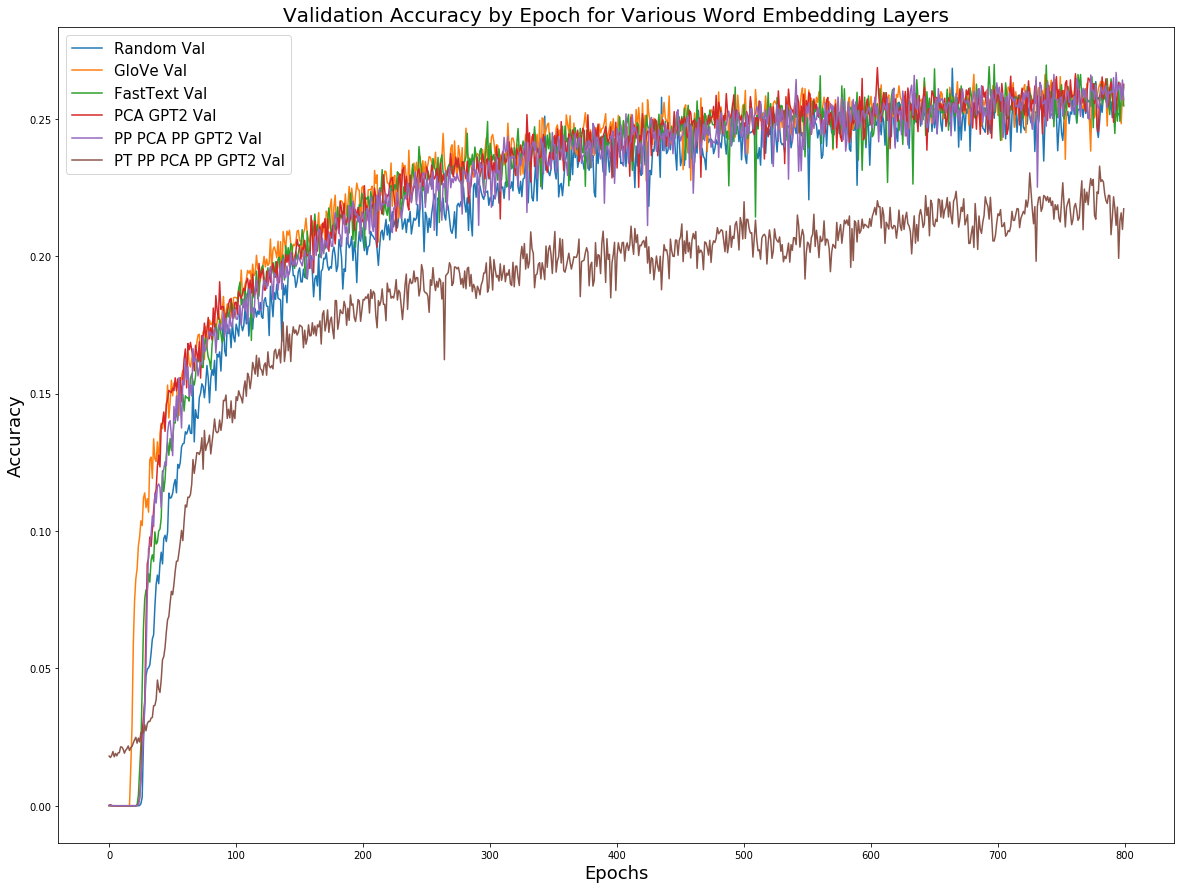

In [34]:
sns.set_palette("tab10")
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.plot(x_axis, pretrainedNet_pp_pca_pp_gpt2_val_accuracy, label='PT PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 3:  Test Set Performance

### Load Test Dataset and Metrics

In [35]:
VOCAB_SIZE = 10000
BATCH_SIZE = 16
CLIENTS_EPOCHS_PER_ROUND = 1
MAX_SEQ_LENGTH = 20
MAX_ELEMENTS_PER_USER = 5000
CENTRALIZED_TRAIN = False
SHUFFLE_BUFFER_SIZE = 1000
NUM_VALIDATION_EXAMPLES = 2
NUM_TEST_EXAMPLES = 1000000

In [36]:
_, _, test_data = dataset.construct_word_level_datasets(
    vocab_size=VOCAB_SIZE,
    batch_size=BATCH_SIZE,
    client_epochs_per_round=CLIENTS_EPOCHS_PER_ROUND,
    max_seq_len=MAX_SEQ_LENGTH,
    max_elements_per_user=MAX_ELEMENTS_PER_USER,
    centralized_train=CENTRALIZED_TRAIN,
    shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
    num_validation_examples=NUM_VALIDATION_EXAMPLES,
    num_test_examples=NUM_TEST_EXAMPLES)

/home/singh_arjun1313/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [37]:
extended_vocab_size = VOCAB_SIZE + len(dataset.get_special_tokens(VOCAB_SIZE))
evaluation_metric_names = ['loss',
                           'num_tokens',
                           'num_tokens_no_oov',
                           'num_batches',
                           'num_examples',
                           'accuracy',
                           'accuracy_no_oov',
                           'accuracy_no_oov_no_oes']

metrics_tracker = validation.model_history_tracker(metric_names=evaluation_metric_names)

### Define Summary Dataframe

In [30]:
df = pd.DataFrame(columns=metrics_tracker.metric_names,
                  index=['small_random',
                         'small_glove',
                         'small_pca_fasttext',
                         'small_pp_pca_pp_fasttext',
                         'small_pca_gpt2',
                         'small_pp_pca_pp_gpt2',
                         'large_random',
                         'large_glove',
                         'large_fasttext',
                         'large_pca_gpt2',
                         'large_pp_pca_pp_gpt2'])

### Set Small Model Parameters

In [31]:
network = '100_256_100'
EMBEDDING_DIM = 100
RNN_UNITS = 256

### Small Network Random Embedding Test Set Performance

In [32]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1078s 108ms/step - loss: 3.3197 - num_tokens: 13314892.0000 - num_tokens_no_oov: 12890483.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2246 - accuracy_no_oov: 0.2198 - accuracy_no_oov_no_eos: 0.1821loss 3.3196925102233887
num_tokens 13314892
num_tokens_no_oov 12890483
num_batches 10000
num_examples 1000000
accuracy 0.22455916
accuracy_no_oov 0.21984304
accuracy_no_oov_no_oes 0.18212083


In [33]:
df.loc['small_random'] = pd.Series(dict(zip(metrics, results)))

### Small Network GloVe Embedding Test Set Performance

In [34]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1078s 108ms/step - loss: 3.2884 - num_tokens: 13292178.0000 - num_tokens_no_oov: 12870442.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2269 - accuracy_no_oov: 0.2221 - accuracy_no_oov_no_eos: 0.1838loss 3.28843982565403
num_tokens 13292178
num_tokens_no_oov 12870442
num_batches 10000
num_examples 1000000
accuracy 0.22685537
accuracy_no_oov 0.22210053
accuracy_no_oov_no_oes 0.18384631


In [35]:
df.loc['small_glove'] = pd.Series(dict(zip(metrics, results)))

### Small Network PCA FastText Embedding Test Set Performance

In [36]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_fasttext_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1084s 108ms/step - loss: 3.3000 - num_tokens: 13301749.0000 - num_tokens_no_oov: 12876575.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2250 - accuracy_no_oov: 0.2204 - accuracy_no_oov_no_eos: 0.1823loss 3.299982002770901
num_tokens 13301749
num_tokens_no_oov 12876575
num_batches 10000
num_examples 1000000
accuracy 0.22503619
accuracy_no_oov 0.22041102
accuracy_no_oov_no_oes 0.18225345


In [37]:
df.loc['small_pca_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Small Network PP PCA PP FastText Embedding Test Set Performance

In [38]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_fasttext_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1113s 111ms/step - loss: 3.2583 - num_tokens: 13201660.0000 - num_tokens_no_oov: 12784089.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2285 - accuracy_no_oov: 0.2235 - accuracy_no_oov_no_eos: 0.1852loss 3.2583301535129547
num_tokens 13201660
num_tokens_no_oov 12784089
num_batches 10000
num_examples 1000000
accuracy 0.2284905
accuracy_no_oov 0.22349273
accuracy_no_oov_no_oes 0.1852109


In [39]:
df.loc['small_pp_pca_pp_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Small Network PCA GPT2 Embedding Test Set Performance

In [40]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1111s 111ms/step - loss: 3.2675 - num_tokens: 13210633.0000 - num_tokens_no_oov: 12797478.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2293 - accuracy_no_oov: 0.2245 - accuracy_no_oov_no_eos: 0.1859loss 3.267487065243721
num_tokens 13210633
num_tokens_no_oov 12797478
num_batches 10000
num_examples 1000000
accuracy 0.22926183
accuracy_no_oov 0.22450736
accuracy_no_oov_no_oes 0.18589404


In [41]:
df.loc['small_pca_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Small Network PP PCA PP GPT2 Embedding Test Set Performance

In [42]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1115s 112ms/step - loss: 3.3365 - num_tokens: 13341354.0000 - num_tokens_no_oov: 12924035.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2262 - accuracy_no_oov: 0.2212 - accuracy_no_oov_no_eos: 0.1834loss 3.3364582981824875
num_tokens 13341354
num_tokens_no_oov 12924035
num_batches 10000
num_examples 1000000
accuracy 0.22622052
accuracy_no_oov 0.22124724
accuracy_no_oov_no_oes 0.18341424


In [43]:
df.loc['small_pp_pca_pp_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Set Large Model Parameters

In [38]:
network = '300_512_300'
EMBEDDING_DIM = 300
RNN_UNITS = 512

### Large Network Random Embedding Test Set Performance

In [45]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1715s 172ms/step - loss: 3.2035 - num_tokens: 13282501.0000 - num_tokens_no_oov: 12859172.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2485 - accuracy_no_oov: 0.2448 - accuracy_no_oov_no_eos: 0.2086loss 3.203522476315498
num_tokens 13282501
num_tokens_no_oov 12859172
num_batches 10000
num_examples 1000000
accuracy 0.24850184
accuracy_no_oov 0.24483971
accuracy_no_oov_no_oes 0.20863755


In [46]:
df.loc['large_random'] = pd.Series(dict(zip(metrics, results)))

### Large Network GloVe Embedding Test Set Performance

In [47]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1701s 170ms/step - loss: 3.1272 - num_tokens: 13320292.0000 - num_tokens_no_oov: 12900351.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2557 - accuracy_no_oov: 0.2523 - accuracy_no_oov_no_eos: 0.2162loss 3.127232478237152
num_tokens 13320292
num_tokens_no_oov 12900351
num_batches 10000
num_examples 1000000
accuracy 0.25569093
accuracy_no_oov 0.25227514
accuracy_no_oov_no_oes 0.21619593


In [48]:
df.loc['large_glove'] = pd.Series(dict(zip(metrics, results)))

### Large Network Fasttext Embedding Test Set Performance

In [49]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/fasttext_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1662s 166ms/step - loss: 3.0977 - num_tokens: 13268729.0000 - num_tokens_no_oov: 12846883.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2548 - accuracy_no_oov: 0.2500 - accuracy_no_oov_no_eos: 0.2137loss 3.097668393230438
num_tokens 13268729
num_tokens_no_oov 12846883
num_batches 10000
num_examples 1000000
accuracy 0.25477052
accuracy_no_oov 0.25000945
accuracy_no_oov_no_oes 0.21365745


In [50]:
df.loc['large_fasttext'] = pd.Series(dict(zip(metrics, results)))

### Large Network PCA GPT2 Embedding Test Set Performance

In [51]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1673s 167ms/step - loss: 3.1416 - num_tokens: 13281917.0000 - num_tokens_no_oov: 12855731.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2522 - accuracy_no_oov: 0.2483 - accuracy_no_oov_no_eos: 0.2118loss 3.1416228546977045
num_tokens 13281917
num_tokens_no_oov 12855731
num_batches 10000
num_examples 1000000
accuracy 0.252159
accuracy_no_oov 0.2482846
accuracy_no_oov_no_oes 0.21179163


In [52]:
df.loc['large_pca_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Large Network PP PCA PP GPT2 Embedding Test Set Performance

In [53]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


  10000/Unknown - 1662s 166ms/step - loss: 3.1255 - num_tokens: 13329464.0000 - num_tokens_no_oov: 12903871.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2569 - accuracy_no_oov: 0.2524 - accuracy_no_oov_no_eos: 0.2169loss 3.1255321005940435
num_tokens 13329464
num_tokens_no_oov 12903871
num_batches 10000
num_examples 1000000
accuracy 0.25687996
accuracy_no_oov 0.2523535
accuracy_no_oov_no_oes 0.21689983


### Large Network Pretrained PP PCA PP GPT2 Embedding Test Set Performance

In [39]:
metrics, results = \
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pretrainedNet_pp_pca_pp_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/singh_arjun1313/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/singh_arjun1313/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


  10000/Unknown - 1704s 170ms/step - loss: 3.4269 - num_tokens: 13282947.0000 - num_tokens_no_oov: 12857214.0000 - num_batches: 10000.0000 - num_examples: 1000000.0000 - accuracy: 0.2235 - accuracy_no_oov: 0.2146 - accuracy_no_oov_no_eos: 0.1761loss 3.4268811831474304
num_tokens 13282947
num_tokens_no_oov 12857214
num_batches 10000
num_examples 1000000
accuracy 0.22354534
accuracy_no_oov 0.21458101
accuracy_no_oov_no_oes 0.1761335


In [54]:
df.loc['large_pp_pca_pp_gpt2'] = pd.Series(dict(zip(metrics, results)))

### Format Test Set Performance Summary
Include hardcoded train times (from `train_time.txt` files), number of model parameters (from `compare_model_sizes.ipynb` files), and model weights (from `weights.h5` files) sizes.  

**Note:** train times include time to generate predictions and compute performance on 20,000 validation samples after each federated training round.

In [55]:
df['train_time(s)'] = [54860.36417341232,
                       56958.261867284775,
                       55436.793415784836,
                       56204.12931251526,
                       54927.33459186554, 
                       56935.840341091156,
                       54922.981483221054,
                       58655.011098623276,
                       55972.44813013077,
                       56168.97843050957,
                       58864.57278966904]

In [56]:
df['model_params'] = 6 * [2402072] + 5 * [7831328]
df['weights_size(mb)'] = 6 * [9.629600] + 5 * [31.345824]

In [57]:
df = df.astype(float).round(4)
df = df[['loss',
         'accuracy',
         'accuracy_no_oov',
         'accuracy_no_oov_no_oes',
         'train_time(s)',
         'model_params',
         'weights_size(mb)']]

### View Test Set Performance Summary (1 Million Test Samples)
**Hypothesis:** We hypothesize that having a common, starting representation for words across federated (non-IID) datasets yields improved model performance with fewer training rounds compared to federated training with randomly initialized word embeddings.  

**Results:** 
- 1. We observe an increase of over a half percent accuracy with pretrained compared to random embeddings for the larger networks when validating on 1,000,000 test samples with little to no improvement from pretrained embeddings for the smaller networks.  
- 2. For both small and large networks we observe from the model learning curves that pretrained word embeddings achieve the same level of accuracy sooner, that is, with fewer training rounds compared to random embeddings.

In [58]:
df

,loss,accuracy,accuracy_no_oov,accuracy_no_oov_no_oes,train_time(s),model_params,weights_size(mb)
small_random,3.3197,0.2246,0.2198,0.1821,54860.3642,2402072.0,9.6296
small_glove,3.2884,0.2269,0.2221,0.1838,56958.2619,2402072.0,9.6296
small_pca_fasttext,3.3000,0.2250,0.2204,0.1823,55436.7934,2402072.0,9.6296
small_pp_pca_pp_fasttext,3.2583,0.2285,0.2235,0.1852,56204.1293,2402072.0,9.6296
small_pca_gpt2,3.2675,0.2293,0.2245,0.1859,54927.3346,2402072.0,9.6296
small_pp_pca_pp_gpt2,3.3365,0.2262,0.2212,0.1834,56935.8403,2402072.0,9.6296
large_random,3.2035,0.2485,0.2448,0.2086,54922.9815,7831328.0,31.3458
large_glove,3.1272,0.2557,0.2523,0.2162,58655.0111,7831328.0,31.3458
large_fasttext,3.0977,0.2548,0.2500,0.2137,55972.4481,7831328.0,31.3458
large_pca_gpt2,3.1416,0.2522,0.2483,0.2118,56168.9784,7831328.0,31.3458


In [59]:
df.to_csv('embedding_layer_comparison.csv')